## Notebook E-tivity 2 CE4021 Linear Regression

**Student name:** Jason Coleman

**Student ID:** 9539719

## Task

You may add as many cells as you require to complete this task.

Perform Task 1 in Jupyter Notebook `CE4021-Etivity2-LR.ipynb` provided in the repository for this E-tivity. This notebook contains a reference implementation of linear regression, a simple but very effective machine learning algorithm that we will discuss in more detail during the next semester. 

## Goal 
The goal of this task is to create your own implementation of linear regression using your own functions to implement the required matrix manipulations. 

1. Inspect the reference implementation and create functions for all the matrix manipulations required to implement the linear regression algorithm. 
2. Use these matrix manipulation functions in a new function that takes the data (X) and outputs (y) and returns the least squares estimate of the linear regression weight vector. Call this function `fit`.
3. Create a second function that uses the weights found by the fit method and a number of data points X to create new predictions. Call this function `predict`.
4. Finally, create a function that returns the weights found by the fit method. Call this function `get_params`.

Please note:

* The function to calculate the inverse of a matrix need only be applicable to 2x2 matrices. All other functions should be able to handle matrices of arbitrary sizes.
* Error handling is very useful to prevent matrices of incorrect sizes resulting in run-time errors. 
* Add appropriate comments (doc strings) to the functions you have created.
* At this stage you should not create a class to encapsulate your code. Please add this element, if time permits, as part of your reflection. 
* GIT commit your tested code and push to your remote branch. TIP: use your own name in the branch name to help your peers find your code.

## Imports

In [334]:
import numpy as np
import matplotlib.pyplot as plt

If you believe required imports are missing, please contact your moderator.

## Reference Implementation

In [335]:
def linreg_weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [336]:
def linreg_predict(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

Load data from file (including bias of 1)

In [337]:
data = np.loadtxt('lr_data.csv', delimiter=',')
x = data[:,0:2]
y= [[data[i,2]] for i in range(0,len(data[:,2]))]

Apply data to linear regression algorithm to obtain weights

In [338]:
weights = linreg_weights(x,y)
weights

array([[-99.46431881],
       [564.20389249]])

(0.0, 3.0, -100.0, 1500.0)

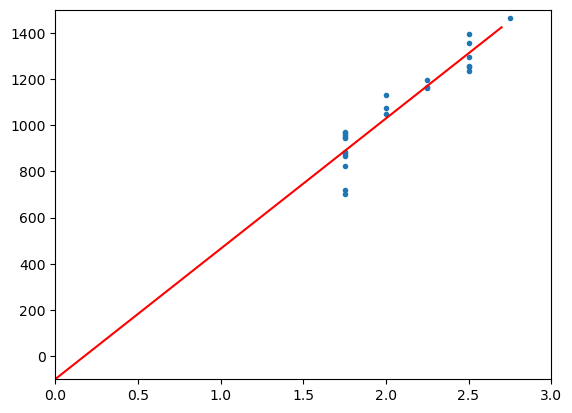

In [339]:
ind = np.arange(0,2.8,0.1)
plt.plot(x[:,1],y,'.')
plt.plot(ind, ind*weights[1]+weights[0],'r')
plt.axis([0, 3, -100, 1500])

## Mathematical Background
The Linear Regression method requires some basic vector and matrix operations. Namely, Transpose, Invert and multiplication (and these require their own functionality like determinant and dot product calculation).

### Linear Regression Overview


Linear regression helps to find the best-fitting straight line (called the regression line) through a set of data points that minimizes the sum of the squares of the vertical distances of the points from the line. This line can then be used to make predictions for any value of $x$. Our goal is to find the minimum of the Error function $E(w)$. This invloves differentiation.

Starting from the given expression for the expected error $E(w)$, where $w$ is the weight vector, $X$ is the matrix of input features, and $y$ is the vector of target outputs, our goal is to minimize this error by finding the optimal values for the weight vector $w$. Here $N$ is the number of samples, $x_n$ is the n-th row of $X$, and $y_n$ is the n-th element of $y$. The expression for the error can be written as:

$$E(w) = \frac{1}{N} \sum_{n=1}^{N} (w^Tx_n - y_n)^2$$

This is the sum of the squared differences between the predicted output $w^Tx_n$ and the actual output $y_n$ for all $N$ samples, and we want to minimize this sum. To find the minimum, we take the derivative of $E(w)$ with respect to $w$. 

$$\frac{\partial}{\partial w}(E(w)) = (X^TX)^{-1}X^Ty$$

Finally, we set to zero (as we want to minimise E(w)) and solve for $w$. This yields the equation:

$$(X^TX)^{-1}X^Ty = 0$$

I've done a lot of hand-waving above... but the net result is that we can determine the weights when we evaluate the following: 

$$(X^TX)^{-1}X^Ty$$

The following section will define vectors, matrices and the operations that are required to achieve linear regression.

### Vectors/Matrices Overview


Here I define the basic core matrix and vector operations. These will be implemented and tested later on. First, I will show the core vector and matrix data representations. An m-dimensional vector can be described as follows:

$$
\begin{bmatrix}
v_1 \\
v_2 \\
\vdots \\
v_m
\end{bmatrix}
$$

Here, $v_i$ represents the element in the i-th row of the vector, and the vector has $m$ rows, making it a column vector of dimension $m$. If you want to represent a row vector, you can arrange the elements horizontally like so:

$$
\begin{bmatrix}
v_1 & v_2 & \cdots & v_n
\end{bmatrix}
$$

The row, column elements are important when you consider compound operations, the order matters and this impacts the shape you will use (explains why we will use transpose operations). An $m$ x $n$ matrix can be represented as folows: 

$$
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix}
$$

Here, $a_{ij}$ represents the element in the i-th row and j-th column of the matrix. The matrix has $m$ rows and $n$ columns, making it an $m$×$n$ matrix.

#### Matrix and Vector Operations
Linear regression requires some fundemental matrix operations. These are described below.

##### Addition/Subtraction/Multiplication
Some typical matrix operations are element-wise operations: `addition`, `subtraction` and `multiplication`. 

$$
A = \begin{bmatrix}2 & 2\\4 & 4\end{bmatrix}
$$

$$
B = \begin{bmatrix}1 & 2\\3 & 1\end{bmatrix}
$$

* Addition

$$
A+B = \begin{bmatrix}a & b \\ c & d\end{bmatrix} + \begin{bmatrix}e & f \\ g & h\end{bmatrix} = \begin{bmatrix}a+e & b+f \\ c+g & d+h\end{bmatrix} 
$$

$$
A+B = \begin{bmatrix}2+1 & 2+2\\4+3 & 4+1\end{bmatrix}
$$

$$
A+B = \begin{bmatrix}3 & 4\\7 & 5\end{bmatrix}
$$


* Subtraction:

$$
A-B = \begin{bmatrix}a & b \\ c & d\end{bmatrix} + \begin{bmatrix}e & f \\ g & h\end{bmatrix} = \begin{bmatrix}a-e & b-f \\ c-g & d-h\end{bmatrix} 
$$

$$
A+B = \begin{bmatrix}2-1 & 2-2\\4-3 & 4-1\end{bmatrix}
$$

$$
A+B = \begin{bmatrix}1 & 0\\1 & 3\end{bmatrix}
$$

* Multiplication:

$$
A \times B = \begin{bmatrix}a & b \\ c & d\end{bmatrix} \times \begin{bmatrix}e & f \\ g & h\end{bmatrix} = \begin{bmatrix}a (e) & b(f) \\ c(g) & d(f)\end{bmatrix} 
$$

$$
A+B = \begin{bmatrix}2*1 & 2*2\\4*3 & 4*1\end{bmatrix}
$$

$$
A+B = \begin{bmatrix}2 & 4\\12 & 4\end{bmatrix}
$$

Element-wise multiplication is used to scale individual elements of a matrix (e.g. apply noise). There is an additional operation for multiplication where we also support matrix-wise multiplication. This is defined as follows, for two matrices $A$ and $B$:

$$
(A.B)_{ij} = \sum_{k=1}^{N}A_{ik} B_{kj}
$$

This can be expressed more mechanically as:

$$
(A \cdot B)_{ij}  = \begin{bmatrix}a & b \\ c & d\end{bmatrix} \cdot \begin{bmatrix}e & f \\ g & h\end{bmatrix} = \begin{bmatrix}a (e) + b(g) & a(f) + b(h)\\c(e) + d(g) & c(f) + d(h)\end{bmatrix} 
$$

$$
(A \cdot B)_{ij}  = \begin{bmatrix}2 & 2 \\ 4 & 4\end{bmatrix} \cdot \begin{bmatrix}1 & 2 \\ 3 & 1\end{bmatrix} = \begin{bmatrix}2(1) + 2(3) & 2(2) + 2(1)\\4(1) + 4(3) & 4(2) + 4(1)\end{bmatrix} 
$$

$$
= \begin{bmatrix}8 & 6 \\ 16 & 12\end{bmatrix}
$$


Here we evaluate the dot product of row and columns for each cell in the matrix.

<center>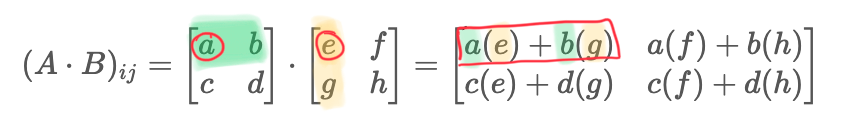</center>

Note that all operations require that the matrices have the right `shape` to be valid. Our code should throw exceptions if the data is ill-formed (i.e. the wrong shape for the operation).

##### Transpose
The `transpose` of a matrix is found by swapping the row and column indices of each element, effectively flipping the matrix over its diagonal (in this case rotating clockwise by 90 degrees).

$$
M = \begin{bmatrix} a & b \\ c & d \end{bmatrix}
$$

The transpose of M is given by: 

$$
M^T = \begin{bmatrix} a & c \\ b & d \end{bmatrix}
$$

##### Inverse
This assignment only covers 2x2 matrices. Given a 2x2 matrix, 

$$
M = \begin{bmatrix} a & b \\ c & d \end{bmatrix}
$$

The `determinant` of A is a scalar value and is given by:

$$
\text{det}(M) = ad - bc
$$

If $det(M)\neq 0$, the inverse of $M$, denoted as $M^{-1}$ is given by:

$$
M^{-1} = \frac{1}{\text{det}(M)} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}
$$

If $det(M) = 0$, then the determinant does not exist.

#### Paper-based Demonstration of the Linear Regression approach.

Here I show a simple implementation of the pseudo-inverse method, used to determine the weights, $w$ in the equation: $Xw = y$. 

If 

$$
Xw = y
$$

Then

$$
XX^{-1}w=X^{-1}y
$$

And $XX^{-1}$ is the identity matrix. So

$$
w=X^{-1}y
$$

But, these matrices need to be squared. I assume that $(X^TX)^{-1}X^T \equiv X^{-1}$ which helps us solve for w with square matrices.

$$w = (X^TX)^{-1}X^Ty$$

##### E.g.

Here's a simple example showing the application of this equation. 

$$w = (X^TX)^{-1}X^Ty$$

Given $X$ and $y$, calculate the weights, $w$ using the pseudo-inverse approach described above.

$$X = \begin{bmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{bmatrix}$$ 

$$y = \begin{bmatrix} 3 \\ 7 \\ 11 \end{bmatrix}$$

##### Find the weights.

**Calculate the Transpose of $X$:**

$$X^T = \begin{bmatrix} 1 & 1 & 1 \\ 1 & 2 & 3 \end{bmatrix}$$

**Calculate the ROW/COL vector Dot Product, $X^T X$:**

$$
X^T X = \begin{bmatrix} 1 & 1 & 1 \\ 1 & 2 & 3 \end{bmatrix} \begin{bmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{bmatrix} = \begin{bmatrix} 3 & 6 \\ 6 & 14 \end{bmatrix} 
$$

**Calculate the Inverse, $(X^T X)^{-1}$:**

$$
(X^T X)^{-1} = \frac{1}{(3 \cdot 14 - 6 \cdot 6)} \begin{bmatrix} 14 & -6 \\ -6 & 3 \end{bmatrix} = \begin{bmatrix} 2.33 & -1 \\ -1 & 0.5 \end{bmatrix}
$$

**Calculate the Dot Product, $X^T y$:**

$$
X^T y = \begin{bmatrix} 1 & 1 & 1 \\ 1 & 2 & 3 \end{bmatrix} \begin{bmatrix} 3 \\ 7 \\ 11 \end{bmatrix} = \begin{bmatrix} 21 \\ 50 \end{bmatrix} 
$$

**Calculate the Weights, $w$:**

$$
w = (X^T X)^{-1} X^T 
y = \begin{bmatrix} 2.33 & -1 \\ -1 & 0.5 \end{bmatrix} \begin{bmatrix} 21 \\ 50 \end{bmatrix} = \begin{bmatrix} -1 \\ 4 \end{bmatrix} 
$$

So, the calculated weights are $w_0 = -1$ and $w_1 = 4$. These weights can be used to make predictions for new data points using the equation:

$$
\text{prediction} = w_0 + w_1 \cdot x 
$$

Which echoes the equation of a line:

$$
y=mx+c
$$

Where $m$ is the slope and $c$ is the y-intercept (our weights).

## Python Implementation

### Data Representations

#### Vectors
Mathematically, vectors can be written as:

$$
v = \begin{bmatrix} a \\ b \end{bmatrix}
$$

In python, vectors, will be represented as ```list[float]```. Like so:

```python
v = [a, b]
```

#### Matrices
Mathematically, matrices can be written as:

$$
M = \begin{bmatrix} a & b \\ c & d \end{bmatrix}
$$

In python, matrices will represented as a `list[list[float]]`. Like so:

```python
A = [[a, b], [c,d]]
```

### Matrix (and a vector) Utility Functions
The section shows the implementation of the utility and core functions. The code has elements to assist debugging.

In [340]:
def print_error(message: str) -> None:
    """
    Prints the given message in red color to help signify an error.

    This is currently a pass-through function as Gitlab doesn't render th
    these characters like the console does.

    :param message: The error message to be printed.
    """
    # Define the ANSI color code for red
    # color_code = "\033[91m"

    # Define the ANSI reset code to stop coloring
    # reset_code = "\033[0m"

    # print(f"{color_code}{message}{reset_code}")
    print(message)

#### Matrix addition, subtraction and multiplication
Starting with the lower-level functions: addition, subtraction and multiplication.

In [341]:
def is_matrix_well_formed(matrix: list[list[float]]) -> bool:
    """
    Some matrix operations require that the
    matrices be well-formed. A matrix is well-formed 
    if all rows in the matrix are of the same length. 
    
    Returns True if the matrix is well-formed. False otherwise.

    input: matrix
    output: bool
    """
    num_cols = len(matrix[0])
    return all(len(row) == num_cols for row in matrix)

def matrix_operation(a: list[list[float]], b: list[list[float]], op: callable) -> list[list[float]]:
    """
    Assumes A and B are matrices of the same size.
    Returns the result of applying the given operation to matrices A and B.
    Raises ValueError if the matrices are not of the same size.

    input : matrix a, matrix b, operation (a lamda function that defines the operation)
    output: matrix result of said operation
    """

    if not (is_matrix_well_formed(a)):
        raise ValueError(f"Input matrix: {a} is not well-formed.")

    if not (is_matrix_well_formed(b)):
        raise ValueError(f"Input matrix: {b} is not well-formed.")   
    
    if len(a) != len(b) or len(a[0]) != len(b[0]):
        raise ValueError("Matrices must be of the same size for the given operation.")

    # shorthand for element-wise operation of two lists - removes the need for a for loop         
    return [[op(a[i][j], b[i][j]) 
             for j in range(len(a[0]))] 
             for i in range(len(a))]

def matrix_element_addition(a: list[list[float]], b: list[list[float]]) -> list[list[float]]:
    """
    Returns the result of adding matrices A and B. Wraps
    matrix_operation and pass the required operation in as a lambda.

    Raises ValueError if the matrices are not of the same size.

    input: matrix a, matrix b
    output: matrix
    """
    return matrix_operation(a, b, lambda x, y: x + y)

def matrix_element_subtraction(a: list[list[float]], b: list[list[float]]) -> list[list[float]]:
    """
    Returns the result of subtracting matrices A and BWraps
    matrix_operation and pass the required operation in as a lambda.

    Raises ValueError if the matrices are not of the same size.

    input: matrix a, matrix b
    output: matrix   
    """
    return matrix_operation(a, b, lambda x, y: x - y)

def matrix_element_multiplication(a: list[list[float]], b: list[list[float]]) -> list[list[float]]:
    """
    Returns the result of an element-wise multiplication of matrices A and B. Wraps
    matrix_operation and pass the required operation in as a lambda.

    Raises ValueError if the matrices are not of the same size.

    input: matrix a, matrix b
    output: matrix   
    """
    return matrix_operation(a, b, lambda x, y: x * y)

def matrix_multiplication(a: list[list[float]], b: list[list[float]])-> list[list[float]]:
    """
    Multiplies two matrices together and returns the result.
    Raises ValueError if the matrices are not compatible.

    input: matrix a, matrix b
    output: matrix
    """
    if len(a[0]) != len(b):
        raise ValueError("The number of columns in A must be the same "
                         "as the number of rows in B for multiplication."
                         "\nA={a}\nB={b}")
    # 
    return [[sum(a[i][k] * b[k][j] for k in range(len(a[0]))) 
             for j in range(len(b[0]))] 
             for i in range(len(a))]

Note my linter is giving me grief over the capital letters in the function signature so I'm deviating from the 'X' and 'y' notation and all arguments to functions are lower-case.

#### Test Addition, Subtraction and Multiplacation of Matrices

In [342]:
a = [[1.0, 2.0], [3.0, 4.0]]
b = [[5.0, 6.0], [7.0, 8.0]]
c = [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0,8.0,9.0], [10.0,11.0,12.0]]
d = [[1.0, 2.0], [4.0, 5.0, 6.0], [7.0,8.0,9.0], [10.0,11.0,12.0]]

print("\nMatrix Element-wise Operations")

print(f"{a} + {b} = {matrix_element_addition(a, b)}")
print(f"{a} - {b} = {matrix_element_subtraction(a, b)}")
print(f"{a} * {b} = {matrix_element_multiplication(a, b)}")

print("\nTest error Conditions")

try:
    print(f"{a} + {c} = {matrix_element_addition(a, c)}")
    print()
except ValueError as e: #Expected
    print_error(f"{a} + {c} = \n\t{e}")

try:
    print(f"{a} - {c} = {matrix_element_subtraction(a, c)}")
    print()
except ValueError as e: #Expected
    print_error(f"{a} - {c} = \n\t{e}")

try:
    print(f"{a} * {c} = {matrix_element_multiplication(a, c)}")
    print()
except ValueError as e: #Expected
    print_error(f"{a} * {c} = \n\t{e}")

try:
    print(f"{a} + {d}: {matrix_element_addition(a, d)}")
    print()
except ValueError as e: #Expected
    print_error(f"{a} + {d} = \n\t{e}")

# Demonstrate the differences between 
# element-wise multiplication and matrix multiplication

print()
e = [[1.0, 2.0], [4.0, 5.0]]
f = [[100, 100], [100, 100]]

print("Element-wise multiplication of e and f:")
print(f"{e} * {f} = {matrix_element_multiplication(e, f)}")
print()

print("Matrix multiplication of e and f:")
print(f"{e} * {f} = {matrix_multiplication(e, f)}")
print()


Matrix Element-wise Operations
[[1.0, 2.0], [3.0, 4.0]] + [[5.0, 6.0], [7.0, 8.0]] = [[6.0, 8.0], [10.0, 12.0]]
[[1.0, 2.0], [3.0, 4.0]] - [[5.0, 6.0], [7.0, 8.0]] = [[-4.0, -4.0], [-4.0, -4.0]]
[[1.0, 2.0], [3.0, 4.0]] * [[5.0, 6.0], [7.0, 8.0]] = [[5.0, 12.0], [21.0, 32.0]]

Test error Conditions
[[1.0, 2.0], [3.0, 4.0]] + [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0], [10.0, 11.0, 12.0]] = 
	Matrices must be of the same size for the given operation.
[[1.0, 2.0], [3.0, 4.0]] - [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0], [10.0, 11.0, 12.0]] = 
	Matrices must be of the same size for the given operation.
[[1.0, 2.0], [3.0, 4.0]] * [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0], [10.0, 11.0, 12.0]] = 
	Matrices must be of the same size for the given operation.
[[1.0, 2.0], [3.0, 4.0]] + [[1.0, 2.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0], [10.0, 11.0, 12.0]] = 
	Input matrix: [[1.0, 2.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0], [10.0, 11.0, 12.0]] is not well-formed.

Element-wise 

#### Matrix Transpose

Now we implement the transpose and invert operations. Note, we only support the inversion of a 2x2 matrix (you can support more but's it's more complex). 

In [343]:
def matrix_transpose(matrix: list[list[float]]) -> list[list[float]]:
    """
    Calculate the transpose of a ROWxCOL matrix.
   
    :param matrix: A list representing a ROWxCOL  matrix.
    :return: A matrix representing the transpose of the input 
             ROWxCOL  matrix.

    """
    num_rows = len(matrix)
    num_cols = len(matrix[0])
    
    transposed = []
    for i in range(num_cols):
        row = []
        for j in range(num_rows):
            row.append(matrix[j][i])
        transposed.append(row)
    
    return transposed
    
    # All of the above could collapse to the following list comprehension:
    # return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]
    # But I think the above is more readable for beginners, for now. My thinking may change
    # on this if I have to keep typing verbose code.

##### Test the Transpose function

In [344]:
x = [[1, 2], [3, 4]]
print(f"X:{x}")

x_T = matrix_transpose(x)
print(f"X transpose:{x_T}")

X:[[1, 2], [3, 4]]
X transpose:[[1, 3], [2, 4]]


#### Matrix Inverse

The following block calculates the inverse of a matrix. It requires that the data be of a certain size and shape (2x2). We use the determinant calculation to establish if an inverse exists.

In [345]:
def matrix_invert(matrix: list[list[float]], debug: bool = False) -> list[list[float]]:
    """
    Calculate the inverse of a 2x2 matrix.
   
    :param matrix: A list representing a 2x2 matrix.
    :return: A matrix representing the inverse of 
             the input 2x2 matrix (if it exists).

    Raise a ValueError if the matrix is singular and 
    non-invertible or if the matrix is not 2x2.
    """
    # Check if the input matrix is 2x2
    if len(matrix) != 2 or len(matrix[0]) != 2 or len(matrix[1]) != 2:
        raise ValueError("The input matrix must be square and, for this assignment 2x2.")
    
    # Calculate the determinant of the matrix. Access the indidivual elements of the matrix
    a, b, c, d = matrix[0][0], matrix[0][1], matrix[1][0], matrix[1][1]

    det = a * d - b * c # This could be a function, but i need a,b,c,d later

    if debug:
        print(f"The determinant of the matrix: {matrix} is {det}")
    
    if det == 0: #space is warped to a line or point
        raise ValueError("The matrix is singular and non-invertible.")
    
    inv_det = 1 / det

    # Calculate the inverse of the matrix - return a 2x2 matrix
    inv_matrix = [[d * inv_det, -b * inv_det], [-c * inv_det, a * inv_det]]

    if debug:
        print(f"The inverse is {inv_matrix}")

    return inv_matrix 

##### Test the inverse
We demonstrate both invertable, non-invertable matrices as well as some interesting properties when working with transpose and inverse matrix multiplication.


In [346]:
x = [[-1, 0], [1, 1]]
print(f"X:{x}")
x_invert = matrix_invert(x, debug=True)
print(f"X invert:{x_invert}")
print()

print(f"X.X^1 = {matrix_multiplication(x, x_invert)} - IDENTITY")

#Let's prove that X(XX^T)^-1X^T = Identity
inverse = identity = matrix_multiplication(
                        matrix_invert(
                        matrix_multiplication(
                            matrix_transpose(x), 
                            x)
                        ), 
                        matrix_transpose(x)
                    )

print(f"X_inv with transpose matrices:{inverse}")

identity = matrix_multiplication(
                matrix_multiplication(
                    matrix_invert(
                        matrix_multiplication(
                            matrix_transpose(x), 
                            x)
                    ), 
                    matrix_transpose(x)
                ), 
                x
            )

print(f"Prove that X(XX^T)^-1X^T = {identity} - ALSO IDENTITY")

try:
    x = [[1, 2], [1, 2]] # where basis vectors are the same
    print(f"X:{x}")
    x_invert = matrix_invert(x, debug=True)
    print(f"X invert:{x_invert}")
except ValueError as e:
    print_error(f"Error: {e}")
print()

try:
    x = [[1, 2], [1]] # not square
    print(f"X:{x}")
    x_invert = matrix_invert(x, debug=True)
    print(f"X invert:{x_invert}")
except ValueError as e:
    print_error(f"Error: {e}")
print()

#Confirm that the multiplication of a matrix and 
#its inverse is the identity matrix (zero matrix
#with ones inthe diagonal)
x = [[-1, 0], [1, 1]]
print(f"X:{x}")
x_inv = [[-1, 0], [1, 1]]
print(f"X invert:{x_inv}")
print(f"X * X_inv:{matrix_multiplication(x, x_inv)}")

X:[[-1, 0], [1, 1]]
The determinant of the matrix: [[-1, 0], [1, 1]] is -1
The inverse is [[-1.0, -0.0], [1.0, 1.0]]
X invert:[[-1.0, -0.0], [1.0, 1.0]]

X.X^1 = [[1.0, 0.0], [0.0, 1.0]] - IDENTITY
X_inv with transpose matrices:[[-1.0, 0.0], [1.0, 1.0]]
Prove that X(XX^T)^-1X^T = [[1.0, 0.0], [0.0, 1.0]] - ALSO IDENTITY
X:[[1, 2], [1, 2]]
The determinant of the matrix: [[1, 2], [1, 2]] is 0
Error: The matrix is singular and non-invertible.

X:[[1, 2], [1]]
Error: The input matrix must be square and, for this assignment 2x2.

X:[[-1, 0], [1, 1]]
X invert:[[-1, 0], [1, 1]]
X * X_inv:[[1, 0], [0, 1]]


#### Vector Dot Product
The core intuition of the dot product of two vectors, from a geometric point of view, is how similar are they. For example, if they are orthogonal the dot product is zero; that is, the projected length of one vector onto the other is zero. This is used quite extensively in graphics and video games (real-time and offline rendering).


In [347]:
def dot_product(vector_1: list[float], vector_2: list[float]) -> float:
    """
    Calculate the dot product of two vectors.
   
    :param vector_1: A list representing a vector.
    :param vector_2: A list representing a vector.
    :return: A float representing the dot product of the two input vectors.

    Raise a ValueError if the vectors are not the same length.
    """
    if len(vector_1) != len(vector_2):
        raise ValueError("The vectors must be the same length.")
    
    return sum(vector_1[i] * vector_2[i] for i in range(len(vector_1)))

##### Test the Dot Product Function
The dot product works on vectors rather than matrices. But a Matrix can be thought of as a row (or column) of vectors so you can dot two matrices (by dotting row and columns). 

In [348]:
dot_product_symbol = "\u22C5"

# Imagine the following vectors are X,Y,Z axes in a 3d coordinate system and we want to determine the similarity between them
x1 = [1, 0, 0]
x2 = [1, 0, 0]
x3 = [-1, 0, 0]

print(f"[1, 0, 0] {dot_product_symbol} [1, 0, 0] = {dot_product(x1, x2)}")
print(f"[1, 0, 0] {dot_product_symbol} [-1, 0, 0] = {dot_product(x1, x3)}")

x1 = [1, 0, 0]
x2 = [0, 1, 0]

print(f"[1, 0, 0] {dot_product_symbol} [0, 1, 0] = {dot_product(x1, x2)}")

v1 = [1, 2, 3]
v2 = [4, 5, 6]
expected_output = 32
assert dot_product(v1, v2) == expected_output #trying out assert to prove correctness

v1 = [1, 2, 3]
v2 = [4, 5]

print(f"{v1} {dot_product_symbol} {v2} =")
try:
    dot_product(v1, v2)
except ValueError as e:
    print_error(f"\tERROR: {e}")

v1 = [1]
v2 = [4]

expected_output = 4
assert dot_product(v1, v2) == expected_output


[1, 0, 0] ⋅ [1, 0, 0] = 1
[1, 0, 0] ⋅ [-1, 0, 0] = -1
[1, 0, 0] ⋅ [0, 1, 0] = 0
[1, 2, 3] ⋅ [4, 5] =
	ERROR: The vectors must be the same length.


A key takeaway is that a vector is 100% similar to itself. And 0% similar to a vector that is orthogonal to it.

### Core Linear Regression Functions
The following blocks do the same as the reference implementation that uses numpy but uses simple python with list comprehensions to achieve the same output (it's pretty verbose). 

In [349]:
def get_params(weights: list[float]) -> list[float]:
    """
    Returns the weights found by the fit method.

    :param weights: A list representing the linear regression weight vector.
    :return: A list representing the weights.
    """
    return weights

In [350]:
def predict(x: list[list[float]], weights: list[float]) -> list[float]:
    """
     Predicts the output using the input data and 
     the linear regression weight vector.

    :param x: A list of lists representing the input data.
    :param weights: A list representing the linear regression weight vector.
    :return: A list representing the predictions.
    """
    # Initialize the list to store the predictions
    predictions = []
    
    # For each input row in X, calculate the dot product with the weight vector
    for row in x:
        if len(row) != len(weights):
            raise ValueError("Number of features must be the same"
                             " as the length of the weight vector.")
        
        prediction = dot_product(row, weights) 
        predictions.append(prediction)
    
    return predictions


In [351]:
def fit(x: list[list[float]], y: list[float], debug: bool = False) -> list[float]:
    """
    Fits a linear regression model using the least squares method.

    :param x: A list of lists representing the input data.
    :param y: A list representing the output data.
    :param debug: A boolean flag to enable temporary 
                  debugging output (useful to test stages). 
                  It is OFF by default.
    :return: A list representing the linear regression weight vector.
    """
    # Check if the number of rows in X is the same as the number of elements in y
    if len(x) != len(y):
        raise ValueError("Number of rows in x must be the "
                         "same as the number of elements in y.")
    
    if debug:
        print(f"DEBUG Fit: x: {x}")
        print(f"DEBUG Fit: y: {y}")
    
    # Transpose the input matrix X - we transpose to enable an
    # impedance match between the dimensions of X^T and X matrices
    # since they may be non-square matrices.
    x_transpose = matrix_transpose(x)

    if debug:
        print(f"DEBUG Fit: x_transpose: {x_transpose}")
    
    # Compute X^T * X
    xtx = matrix_multiplication(x_transpose, x)

    if debug:
        print(f"DEBUG Fit: x_transpose * x: {xtx}")
    
    # Compute the inverse of X^T * X
    xtx_inv = matrix_invert(xtx)

    if debug:
        print(f"DEBUG Fit: (x_transpose * x)^-1: {xtx_inv}")
    
    # Compute X^T * y - this uses a trick to convert y into a list of lists
    # to enable the matrix multiplication. 
    # I will likely edit this further. This is a really a hack and not very intuitive.
    xty = matrix_multiplication(x_transpose, [[val] for val in y])

    if debug:
        print(f"DEBUG Fit: x_transpose * y: {xty}")
    
    # Compute the weight vector as (X^T * X)^-1 * X^T * y
    weights = matrix_multiplication(xtx_inv, xty)
    
    # Flatten the weight matrix to a list
    weights = [row[0] for row in weights]
    
    return weights

#### Test Core Implementation
Include some examples to demonstrate the happy and sad paths for the main functionaility and the utility functions. 

In [352]:
print("Recreate the paper-based example "
      "from above; confirm the results are the same.\n")
x = [[1, 1], [1, 2], [1, 3]]  # Input data (ROW x COLUMN - 3x2)
y = [3, 7, 11]  # Output data (ROW x COLUMN - 3x1)

# Fit the model and get the weights
weights = fit(x, y, debug=True)

# Get the parameters
params = get_params(weights)

# Predict with the obtained weights - essentially testing how good our "model" is
predictions = predict(x, params)

print("\nOutput:")
print("\tWeights:", params)
print("\tPredictions (for X):", predictions)

Recreate the paper-based example from above; confirm the results are the same.

DEBUG Fit: x: [[1, 1], [1, 2], [1, 3]]
DEBUG Fit: y: [3, 7, 11]
DEBUG Fit: x_transpose: [[1, 1, 1], [1, 2, 3]]
DEBUG Fit: x_transpose * x: [[3, 6], [6, 14]]
DEBUG Fit: (x_transpose * x)^-1: [[2.333333333333333, -1.0], [-1.0, 0.5]]
DEBUG Fit: x_transpose * y: [[21], [50]]

Output:
	Weights: [-1.000000000000007, 4.0]
	Predictions (for X): [2.999999999999993, 6.999999999999993, 10.999999999999993]


### (Utility) Loading Data from Comma Seperated Value (csv) files

The purpose of this function is to read the data file. The code is specific to the shape of the csv file. I assume that the CSV file is in the same directory as the script and named "lr_data.csv".It seems that the bias of one is built into the data set, in the first column.

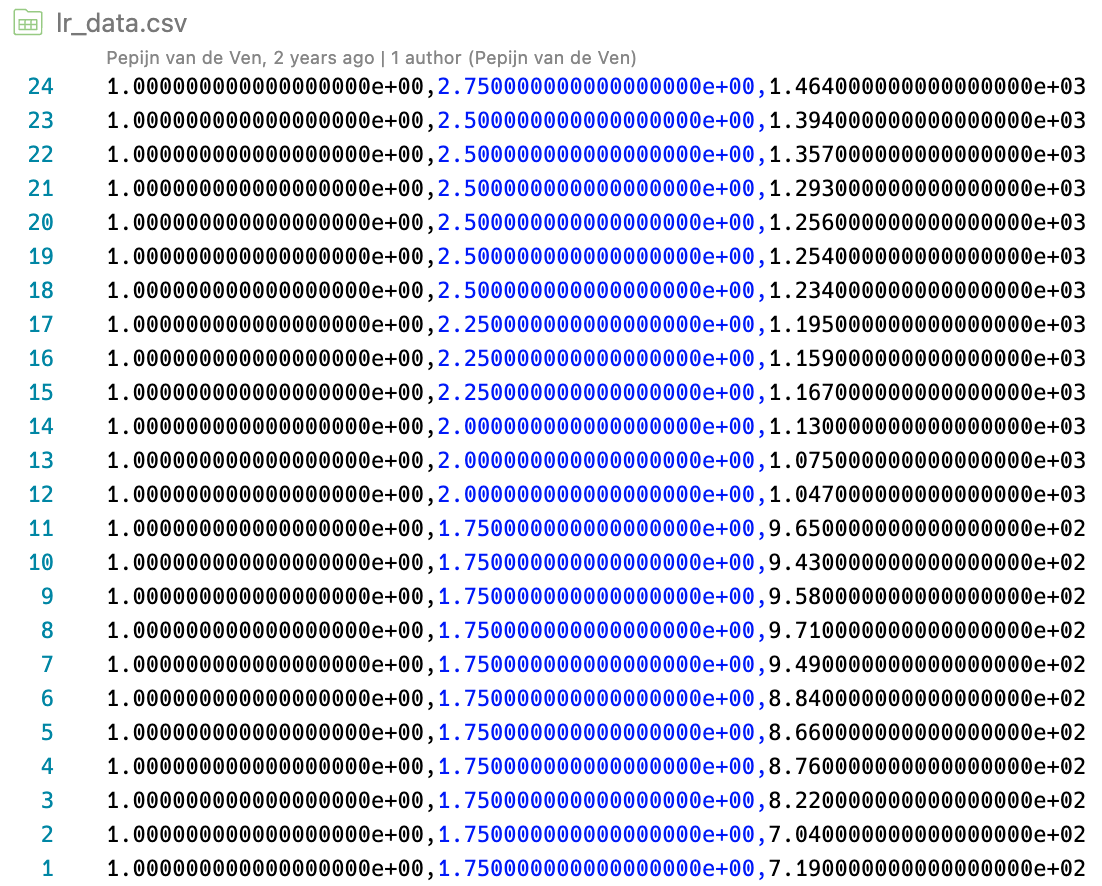


The following snippet reads the file into the lists $X$ and $y$.

In [353]:
file_name = "lr_data.csv"

# Initialize X and y
x = []
y = []

# Open the ascii file and read line by line
try:
    with open(file_name, 'r') as file:      
        # Read each line, split the values on the commas, and append to X and y lists
        for line in file:
            values = line.strip().split(',')
            x.append([float(value) for value in values[:-1]])  # All columns except the last one are inputs
            y.append(float(values[-1]))  # The last column is the output value (that we will predict)
except FileNotFoundError:
    print(f"{file_name} not found.")
except Exception as e:
    print(f"Error reading {file_name}: {e}")

print(f"X values: {x}")
print(f"y values: {y}")

X values: [[1.0, 2.75], [1.0, 2.5], [1.0, 2.5], [1.0, 2.5], [1.0, 2.5], [1.0, 2.5], [1.0, 2.5], [1.0, 2.25], [1.0, 2.25], [1.0, 2.25], [1.0, 2.0], [1.0, 2.0], [1.0, 2.0], [1.0, 1.75], [1.0, 1.75], [1.0, 1.75], [1.0, 1.75], [1.0, 1.75], [1.0, 1.75], [1.0, 1.75], [1.0, 1.75], [1.0, 1.75], [1.0, 1.75], [1.0, 1.75]]
y values: [1464.0, 1394.0, 1357.0, 1293.0, 1256.0, 1254.0, 1234.0, 1195.0, 1159.0, 1167.0, 1130.0, 1075.0, 1047.0, 965.0, 943.0, 958.0, 971.0, 949.0, 884.0, 866.0, 876.0, 822.0, 704.0, 719.0]


Now we use the `fit`, `get_params` and `predict` functions on the input data, extracted form the file.

In [354]:
# Fit the model and get the weights from the CSV file
weights = fit(x, y)

# Get the parameters
params = get_params(weights)

# Predict with the obtained weights
predictions = predict(x, params)

print("Weights:", params)
print("Predictions:", predictions)

Weights: [-99.46431881371245, 564.2038924930494]
Predictions: [1452.0963855421733, 1311.045412418911, 1311.045412418911, 1311.045412418911, 1311.045412418911, 1311.045412418911, 1311.045412418911, 1169.9944392956486, 1169.9944392956486, 1169.9944392956486, 1028.9434661723863, 1028.9434661723863, 1028.9434661723863, 887.8924930491239, 887.8924930491239, 887.8924930491239, 887.8924930491239, 887.8924930491239, 887.8924930491239, 887.8924930491239, 887.8924930491239, 887.8924930491239, 887.8924930491239, 887.8924930491239]


### Visualise the Hand-Rolled Linear Regression output
Finally, we visualise the result of my hand-rolled linear regression.

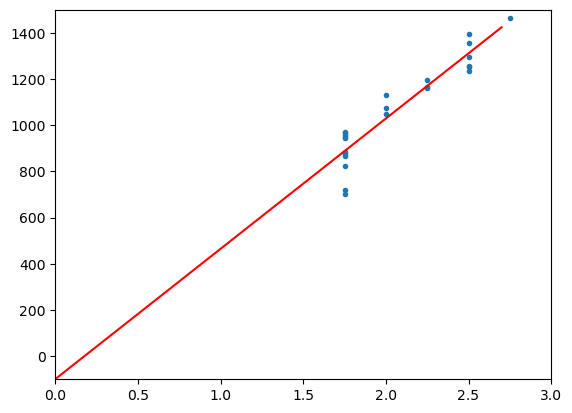

In [355]:
params = get_params(weights)  # Assuming you have computed params beforehand

# Creating index array
indices = [i for i in range(28)]
indices = [i/10.0 for i in indices]  # Dividing each element by 10 to get 0, 0.1, 0.2, ..., 2.7

# Extracting second element from each sublist in X
x_values = [x[1] for x in x]

# Plotting
plt.plot(x_values, y, '.')
plt.plot(indices, [i * params[1] + params[0] for i in indices], 'r')
plt.axis([0, 3, -100, 1500])
plt.show()


## Reflection

Initial impressions are that:

1. numpy saves us a ton of code! 
2. list comprehensions, while initially incomprehensible, save a lot of typing.

### Using Python Classes
We can create Python classes for vector and matrix...

## References:

* Essence of Linear Algebra: https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&pp=iAQBi
* "mathematics for 3d Game Programmers & Computer Graphics" by Eric Lengyel. Chapter 2, https://www.amazon.com/dp/1435458869.
* "3D math Primer for Graphics and Game Development" by Fletcher Dunn and Ian Parberry, https://www.amazon.com/Graphics-Development-Hardcover-Fletcher-Parberry/dp/B00DJ4U856

The graphics books in particular are useful for helping to visualise the matrix operations.